In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

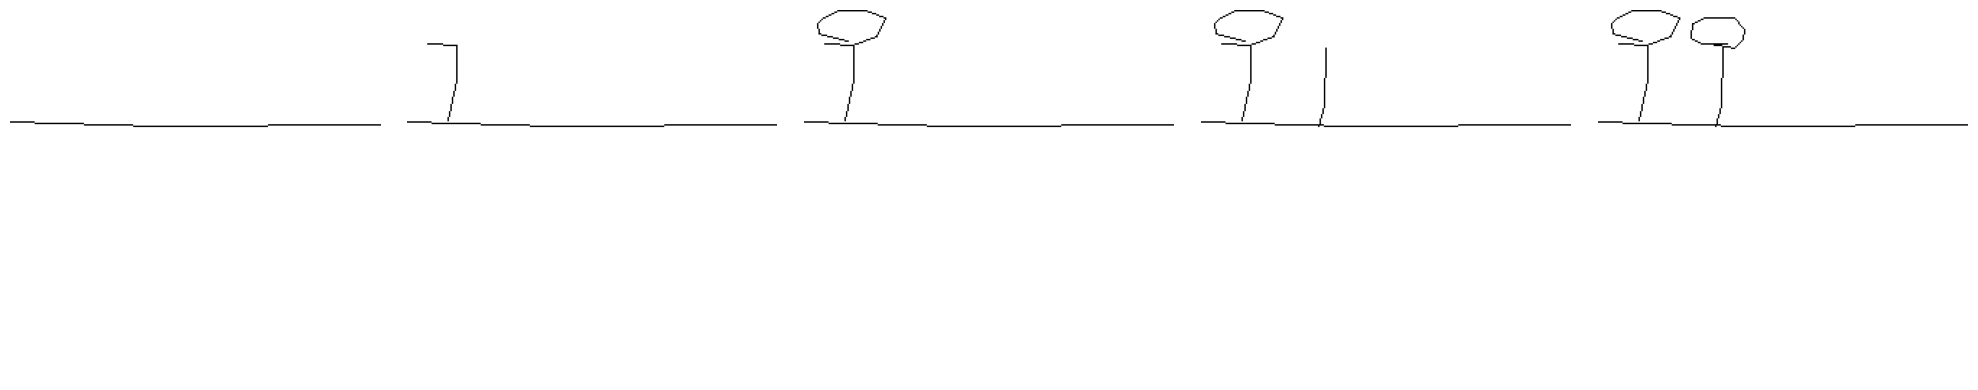

In [5]:
class TrainDataIllustrator:
    def __init__(self, image_dir):
        self.image_dir = image_dir

    def get_image_sequence(self, idx):
        image_files = sorted(list(self.image_dir.glob(f"{idx:06d}_*.png")))
        return image_files

    def draw_image_sequence(self, idx, save_as=None):
        image_files = self.get_image_sequence(idx)
        n = len(image_files)
        if n == 0:
            print(f"No images found for index {idx}")
            return
        images = [Image.open(image_file) for image_file in image_files]
        fig, axes = plt.subplots(1, n, figsize=(n * 4, 4))
        for ax, image in zip(axes, images):
            # convert to np image
            image = np.array(image)
            ax.imshow(image)
            ax.axis("off")
        plt.tight_layout()
        if save_as:
            plt.savefig(save_as)
        else:
            plt.show()


visualizer = TrainDataIllustrator(
    Path("../data/quickdraw/processed/garden/images_train")
)
visualizer.draw_image_sequence(19)

In [6]:
%reload_ext autoreload

%autoreload 2

from seqsketch.data import QuickDrawDataModule

datamodule = QuickDrawDataModule(
    data_dir="../data/quickdraw/processed",
    category="cat",
    batch_size=1,
    val_size=0.1,
)

datamodule.prepare_data()
datamodule.setup()
train_loader = datamodule.train_dataloader()
iterator = iter(train_loader)

{'n_strokes': tensor([5]), 'step': tensor([2]), 'next_stroke': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]]), 'current_strokes': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])}


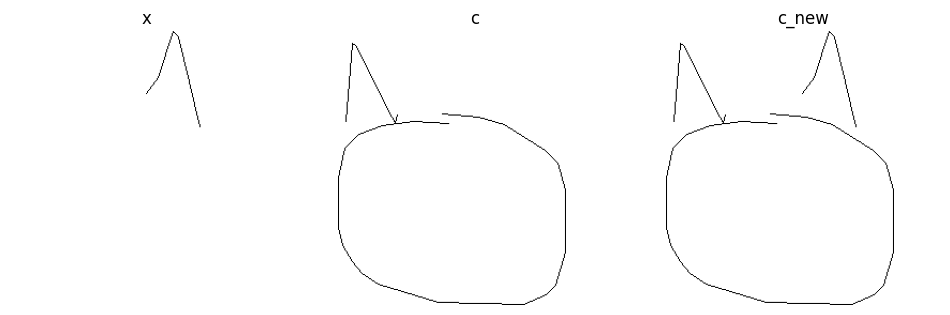

In [8]:
from seqsketch.models import SeqStrokeDiffusionModule
import matplotlib.pyplot as plt

model = SeqStrokeDiffusionModule()
batch = next(iterator)
print(batch)
x, c = model.prepare_batch(batch)
c_new = model.post_process(x, c)


def illustrate_sample(x, c, c_new):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(x[0].numpy().squeeze(), cmap="gray", vmin=0, vmax=1)
    axes[0].axis("off")
    axes[0].set_title("x")
    axes[1].imshow(c[0].numpy().squeeze(), cmap="gray", vmin=0, vmax=1)
    axes[1].axis("off")
    axes[1].set_title("c")
    axes[2].imshow(c_new[0].numpy().squeeze(), cmap="gray", vmin=0, vmax=1)
    axes[2].axis("off")
    axes[2].set_title("c_new")


illustrate_sample(x, c, c_new)

In [69]:
(x + c).min()

tensor(1.)

In [63]:
c_new.sum()

tensor(65536.)

In [33]:
batch = next(iterator)
batch

{'n_strokes': tensor([ 9,  6, 12,  ...,  9,  7, 11]),
 'step': tensor([ 4,  1, 11,  ...,  0,  6,  5]),
 'next_stroke': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         ...,
 
 
         [[[1., 1., 1., 

In [9]:
len(train_loader.dataset)

98256

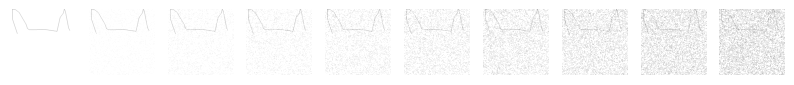

In [24]:
%reload_ext autoreload
%autoreload 2
from seqsketch.models import SeqStrokeDiffusionModule
from seqsketch.data import QuickDrawDataModule
from matplotlib import pyplot as plt

datamodule = QuickDrawDataModule(
    data_dir="../data/quickdraw/processed",
    category="cat",
    batch_size=1,
)
datamodule.prepare_data()
datamodule.setup()
train_loader = datamodule.train_dataloader()
batch = next(iter(train_loader))

# intialize model with default parameters
model = SeqStrokeDiffusionModule()
x = model.prepare_batch(batch)[0]

x.shape
model.add_noise(x,0).shape
fig, ax = plt.subplots(1, 10, figsize=(10, 5))
for i in range(10):
    t = model.num_timesteps//50 * i
    ax[i].imshow(model.add_noise(x, t)[0].squeeze(), cmap="gray", vmin=-1, vmax=1)
    ax[i].axis("off")

In [20]:
model.alpha_cumprod

tensor([9.0000e-01, 8.0991e-01, 7.2876e-01, 6.5566e-01, 5.8983e-01, 5.3055e-01,
        4.7718e-01, 4.2913e-01, 3.8587e-01, 3.4694e-01, 3.1190e-01, 2.8036e-01,
        2.5199e-01, 2.2646e-01, 2.0350e-01, 1.8284e-01, 1.6427e-01, 1.4756e-01,
        1.3254e-01, 1.1903e-01, 1.0689e-01, 9.5977e-02, 8.6168e-02, 7.7353e-02,
        6.9432e-02, 6.2315e-02, 5.5921e-02, 5.0178e-02, 4.5020e-02, 4.0387e-02,
        3.6227e-02, 3.2492e-02, 2.9139e-02, 2.6128e-02, 2.3427e-02, 2.1002e-02,
        1.8826e-02, 1.6874e-02, 1.5122e-02, 1.3551e-02, 1.2142e-02, 1.0878e-02,
        9.7441e-03, 8.7277e-03, 7.8165e-03, 6.9997e-03, 6.2675e-03, 5.6112e-03,
        5.0231e-03, 4.4962e-03, 4.0241e-03, 3.6011e-03, 3.2223e-03, 2.8829e-03,
        2.5791e-03, 2.3070e-03, 2.0633e-03, 1.8452e-03, 1.6500e-03, 1.4752e-03,
        1.3189e-03, 1.1789e-03, 1.0537e-03, 9.4170e-04, 8.4149e-04, 7.5187e-04,
        6.7172e-04, 6.0004e-04, 5.3595e-04, 4.7865e-04, 4.2743e-04, 3.8165e-04,
        3.4074e-04, 3.0417e-04, 2.7150e-

In [1]:
import json

path = "../data/quickdraw/cat/train_test_indices.json"
with open(path, "r") as f:
    indices = json.load(f)

train_indices = indices["train"]
test_indices = indices["test"]
print(
    "number of training examples:",
    len(train_indices),
    "number of test examples:",
    len(test_indices),
)
print(
    "unique training examples:",
    len(set(train_indices)),
    "unique test examples:",
    len(set(test_indices)),
)
print("intersection:", len(set(train_indices).intersection(set(test_indices))))

FileNotFoundError: [Errno 2] No such file or directory: '../data/quickdraw/cat/train_test_indices.json'

In [30]:
[0, 1, 2, 3][:1]

[0]